In [1]:
from codecarbon import EmissionsTracker
try:
    tracker.stop()  # Intenta detener cualquier instancia previa de codecarbon
except:
    pass  # Ignora el error si no hay ninguna instancia activa
# Iniciar el medidor
tracker = EmissionsTracker()
tracker.start()

[codecarbon INFO @ 20:34:26] [setup] RAM Tracking...
[codecarbon INFO @ 20:34:26] [setup] CPU Tracking...
[codecarbon WARNING @ 20:34:29] No CPU tracking mode found. Falling back on CPU constant mode. 
 Mac OS and ARM processor detected: Please enable PowerMetrics sudo to measure CPU

[codecarbon INFO @ 20:34:31] CPU Model on constant consumption mode: Apple M1
[codecarbon INFO @ 20:34:31] [setup] GPU Tracking...
[codecarbon INFO @ 20:34:31] No GPU found.
[codecarbon INFO @ 20:34:31] >>> Tracker's metadata:
[codecarbon INFO @ 20:34:31]   Platform system: macOS-10.16-x86_64-i386-64bit
[codecarbon INFO @ 20:34:31]   Python version: 3.9.12
[codecarbon INFO @ 20:34:31]   CodeCarbon version: 2.8.3
[codecarbon INFO @ 20:34:31]   Available RAM : 8.000 GB
[codecarbon INFO @ 20:34:31]   CPU count: 8
[codecarbon INFO @ 20:34:31]   CPU model: Apple M1
[codecarbon INFO @ 20:34:31]   GPU count: None
[codecarbon INFO @ 20:34:31]   GPU model: None
[codecarbon INFO @ 20:34:35] Saving emissions data to

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # statistical data visualization
%matplotlib inline

In [3]:
data = '/Users/lucia/.cache/kagglehub/datasets/bhoomikavalani/donateacrycorpusfeaturesdataset/versions/2/donateacry-corpus_features_final.csv'

df = pd.read_csv(data)

In [4]:
df.head()

,Cry_Audio_File,Cry_Reason,Amplitude_Envelope_Mean,RMS_Mean,ZCR_Mean,STFT_Mean,SC_Mean,SBAN_Mean,SCON_Mean,MFCCs13Mean,...,MFCCs4,MFCCs5,MFCCs6,MFCCs7,MFCCs8,MFCCs9,MFCCs10,MFCCs11,MFCCs12,MFCCs13
0,/Users/mac/Desktop/Smart_Cradle/donateacry_cor...,0,0.028202,0.011050,0.098990,0.102389,1264.335599,519.101121,26.821807,-48.271230,...,-15.073559,10.004257,-30.088297,-18.766724,8.679635,-2.352078,-7.746244,-3.096202,-4.715273,-3.918095
1,/Users/mac/Desktop/Smart_Cradle/donateacry_cor...,0,0.021071,0.006951,0.115383,0.050369,1268.608766,575.457549,25.881312,-49.861237,...,-10.316871,-0.607061,-25.927773,-4.430356,-4.619092,-22.430754,-4.303273,0.172620,-11.258208,-3.497785
2,/Users/mac/Desktop/Smart_Cradle/donateacry_cor...,0,0.029967,0.010904,0.116663,0.100042,1546.578200,699.626649,26.594715,-49.541706,...,-22.161522,2.070754,-26.675592,3.294869,7.788799,-21.903955,-5.744544,4.150358,-11.718720,-6.870083
3,/Users/mac/Desktop/Smart_Cradle/donateacry_cor...,0,0.027163,0.010520,0.085081,0.140766,1089.415328,668.895951,25.608310,-44.275997,...,-1.704598,0.226281,-29.814095,-14.937744,-11.162116,-21.503994,-7.501309,-7.856627,-15.119538,-3.970483
4,/Users/mac/Desktop/Smart_Cradle/donateacry_cor...,0,0.016663,0.006577,0.067108,0.057629,1017.610932,700.682410,28.196010,-51.325264,...,7.812110,-9.098410,-34.050182,-9.673841,-11.780775,-24.962975,-7.697065,-9.014325,-15.366213,-2.237437


In [5]:
import re

def extraer_info_mejorada(ruta):
    # Extrae con regex el patrón típico del final del nombre del archivo
    match = re.search(r'-([\d.]+)-(m|f)-(\d+)-', ruta)
    if match:
        # match.groups() devuelve (edad_raw, genero, edad_clasificada)
        edad_raw, genero, edad = match.groups()
        return genero, edad
    else:
        return None, None  # si no encuentra patrón, deja como None

df[['Genero', 'Edad_Codigo']] = df['Cry_Audio_File'].apply(lambda x: pd.Series(extraer_info_mejorada(x)))

df['Genero'] = df['Genero'].map({'m': 0, 'f': 1})

edad_map = {
    '04': 1,
    '48': 2,
    '26': 3,
    '72': 4,
    '22': 5
}

df['Edad'] = df['Edad_Codigo'].map(edad_map)

df.drop(columns=['Cry_Audio_File', 'Edad_Codigo'], inplace=True)


In [6]:
df.head()

,Cry_Reason,Amplitude_Envelope_Mean,RMS_Mean,ZCR_Mean,STFT_Mean,SC_Mean,SBAN_Mean,SCON_Mean,MFCCs13Mean,delMFCCs13,...,MFCCs6,MFCCs7,MFCCs8,MFCCs9,MFCCs10,MFCCs11,MFCCs12,MFCCs13,Genero,Edad
0,0,0.028202,0.011050,0.098990,0.102389,1264.335599,519.101121,26.821807,-48.271230,0.082188,...,-30.088297,-18.766724,8.679635,-2.352078,-7.746244,-3.096202,-4.715273,-3.918095,0,3
1,0,0.021071,0.006951,0.115383,0.050369,1268.608766,575.457549,25.881312,-49.861237,0.101375,...,-25.927773,-4.430356,-4.619092,-22.430754,-4.303273,0.172620,-11.258208,-3.497785,1,3
2,0,0.029967,0.010904,0.116663,0.100042,1546.578200,699.626649,26.594715,-49.541706,0.023605,...,-26.675592,3.294869,7.788799,-21.903955,-5.744544,4.150358,-11.718720,-6.870083,0,1
3,0,0.027163,0.010520,0.085081,0.140766,1089.415328,668.895951,25.608310,-44.275997,-0.016075,...,-29.814095,-14.937744,-11.162116,-21.503994,-7.501309,-7.856627,-15.119538,-3.970483,0,4
4,0,0.016663,0.006577,0.067108,0.057629,1017.610932,700.682410,28.196010,-51.325264,0.021112,...,-34.050182,-9.673841,-11.780775,-24.962975,-7.697065,-9.014325,-15.366213,-2.237437,0,4


In [7]:
col_names = df.columns

col_names

Index(['Cry_Reason', 'Amplitude_Envelope_Mean', 'RMS_Mean', 'ZCR_Mean',
       'STFT_Mean', 'SC_Mean', 'SBAN_Mean', 'SCON_Mean', 'MFCCs13Mean',
       'delMFCCs13', 'del2MFCCs13', 'MelSpec', 'MFCCs20', 'MFCCs1', 'MFCCs2',
       'MFCCs3', 'MFCCs4', 'MFCCs5', 'MFCCs6', 'MFCCs7', 'MFCCs8', 'MFCCs9',
       'MFCCs10', 'MFCCs11', 'MFCCs12', 'MFCCs13', 'Genero', 'Edad'],
      dtype='object')

In [8]:
X = df.drop(['Cry_Reason'], axis=1)

y = df['Cry_Reason']

In [9]:
# split X and y into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [10]:
cols = X_train.columns


In [11]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

In [12]:
X_train = pd.DataFrame(X_train, columns=[cols])


In [13]:
X_test = pd.DataFrame(X_test, columns=[cols])


MODELO

In [14]:
# train a logistic regression model on the training set
from sklearn.linear_model import LogisticRegression


# instantiate the model
logreg = LogisticRegression(solver='liblinear', random_state=0)


# fit the model
logreg.fit(X_train, y_train)

LogisticRegression(random_state=0, solver='liblinear')

In [15]:
y_pred_test = logreg.predict(X_test)

y_pred_test

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3])

In [16]:
# probability of getting output as 0 - belly pain

logreg.predict_proba(X_test)[:,0]

array([0.06960853, 0.0665445 , 0.03587045, 0.03035168, 0.0134322 ,
       0.04063632, 0.05244816, 0.08653925, 0.03283784, 0.0072394 ,
       0.00764983, 0.02937704, 0.0234137 , 0.0175077 , 0.00883317,
       0.03138768, 0.03293756, 0.00674098, 0.01986794, 0.01380028,
       0.01904125, 0.06735527, 0.01068419, 0.03260782, 0.03161753,
       0.04759249, 0.01109672, 0.00804955, 0.01230102, 0.0478967 ,
       0.01347863, 0.01000708, 0.03097244, 0.02954149, 0.05952109,
       0.07510789, 0.04206504, 0.00837864, 0.03303431, 0.00904478,
       0.0868217 , 0.03106543, 0.01612153, 0.02095939, 0.03610994,
       0.01130253, 0.03541528, 0.00955887, 0.00655901, 0.02412013,
       0.03180082, 0.03058468, 0.0558679 , 0.00799057, 0.01087154,
       0.03261671, 0.03390209, 0.03698812, 0.06150087, 0.05116447,
       0.04680614, 0.03415401, 0.06924807, 0.00502414, 0.02390981,
       0.0092343 , 0.01081244, 0.02612315, 0.04495654, 0.01112648,
       0.0062611 , 0.05467647, 0.03286556, 0.04124713, 0.00642

In [17]:
# probability of getting output as 1 - burping

logreg.predict_proba(X_test)[:,1]

array([0.03338265, 0.01644153, 0.01288511, 0.0096047 , 0.02419931,
       0.00978377, 0.01406661, 0.01653666, 0.01011   , 0.04682256,
       0.01487319, 0.01009489, 0.02303984, 0.00910698, 0.02757888,
       0.01389433, 0.01738259, 0.02463413, 0.04477777, 0.02176562,
       0.02577164, 0.01426219, 0.045691  , 0.00789972, 0.00797803,
       0.0232477 , 0.04598339, 0.01946357, 0.01855936, 0.03087555,
       0.02673618, 0.01853686, 0.03279914, 0.01869345, 0.03108017,
       0.01241781, 0.0079818 , 0.0227095 , 0.03237124, 0.0173046 ,
       0.0369206 , 0.00867247, 0.02637269, 0.00967011, 0.00957537,
       0.02769923, 0.03541231, 0.02169969, 0.01381899, 0.00561537,
       0.01014456, 0.01121547, 0.01729473, 0.0171004 , 0.01760527,
       0.01509677, 0.01062037, 0.00934506, 0.01377392, 0.01306847,
       0.01330146, 0.0090952 , 0.01480116, 0.01722066, 0.01092815,
       0.0249976 , 0.02020632, 0.01287732, 0.00894566, 0.02323588,
       0.0151708 , 0.00970607, 0.00839791, 0.08102053, 0.01264

In [18]:
from sklearn.metrics import accuracy_score

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred_test)))

Model accuracy score: 0.8587


In [19]:
y_pred_train = logreg.predict(X_train)

y_pred_train

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,

In [20]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Training-set accuracy score: 0.8301


In [21]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(logreg.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(logreg.score(X_test, y_test)))

Training set score: 0.8301
Test set score: 0.8587


Probamos CV para ver cual es el mejor modelo

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Definimos el grid de parámetros
param_grid = [
    {
        'penalty': ['l1'],
        'C': [0.001, 0.01, 0.1, 1, 10, 100],
        'solver': ['liblinear', 'saga'],
        'max_iter': [1000]
    },
    {
        'penalty': ['l2'],
        'C': [0.001, 0.01, 0.1, 1, 10, 100],
        'solver': ['lbfgs', 'liblinear', 'saga'],
        'max_iter': [1000]
    }
]

# Modelo base
logreg = LogisticRegression(random_state=0)

# GridSearchCV
grid_search = GridSearchCV(estimator=logreg,
                           param_grid=param_grid,
                           scoring='accuracy',
                           cv=5,
                           verbose=1,
                           n_jobs=-1)

# Entrenamos
grid_search.fit(X_train, y_train)

# Resultados
print("\n🔍 Mejor puntuación media en validación cruzada: {:.4f}".format(grid_search.best_score_))
print("📌 Mejores parámetros encontrados:", grid_search.best_params_)
print("🧠 Mejor modelo:", grid_search.best_estimator_)


Fitting 5 folds for each of 30 candidates, totalling 150 fits


/Users/lucia/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/lucia/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/lucia/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/lucia/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/lucia/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/lucia/opt/anaconda3/lib/python3.9/site-pack


🔍 Mejor puntuación media en validación cruzada: 0.8301
📌 Mejores parámetros encontrados: {'C': 0.001, 'max_iter': 1000, 'penalty': 'l1', 'solver': 'saga'}
🧠 Mejor modelo: LogisticRegression(C=0.001, max_iter=1000, penalty='l1', random_state=0,
                   solver='saga')


In [23]:
from sklearn.metrics import accuracy_score, recall_score, f1_score, roc_auc_score

# Entrenamos el mejor modelo
mejor_modelo = grid_search.best_estimator_
mejor_modelo.fit(X_train, y_train)

# Predicciones
y_pred = mejor_modelo.predict(X_test)
y_proba = mejor_modelo.predict_proba(X_test)  # OJO: ahora son múltiples columnas

# Métricas
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
auc = roc_auc_score(y_test, y_proba, multi_class='ovr', average='weighted')  # AUC multiclase

# Resultados
print(f"✅ Accuracy:     {accuracy:.4f}")
print(f"✅ Sensibilidad: {recall:.4f}")
print(f"✅ F1 Score:     {f1:.4f}")
print(f"✅ AUC:          {auc:.4f}")




✅ Accuracy:     0.8587
✅ Sensibilidad: 0.8587
✅ F1 Score:     0.7934
✅ AUC:          0.5000


/Users/lucia/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


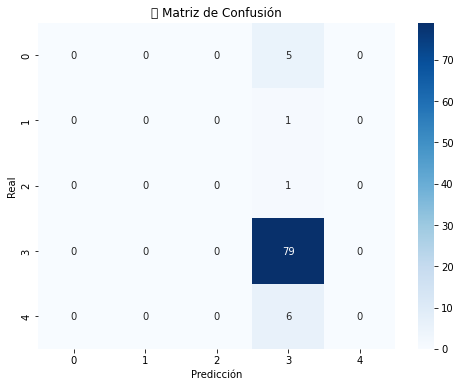

/Users/lucia/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


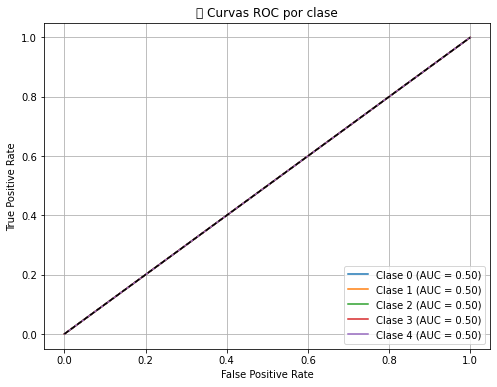


📉 Clase 0 – Top 5 variables más influyentes:
   ('Edad',): coef = 0.0000
   ('MFCCs1',): coef = 0.0000
   ('RMS_Mean',): coef = 0.0000
   ('ZCR_Mean',): coef = 0.0000
   ('STFT_Mean',): coef = 0.0000

📉 Clase 1 – Top 5 variables más influyentes:
   ('Edad',): coef = 0.0000
   ('MFCCs1',): coef = 0.0000
   ('RMS_Mean',): coef = 0.0000
   ('ZCR_Mean',): coef = 0.0000
   ('STFT_Mean',): coef = 0.0000

📉 Clase 2 – Top 5 variables más influyentes:
   ('Edad',): coef = 0.0000
   ('MFCCs1',): coef = 0.0000
   ('RMS_Mean',): coef = 0.0000
   ('ZCR_Mean',): coef = 0.0000
   ('STFT_Mean',): coef = 0.0000

📉 Clase 3 – Top 5 variables más influyentes:
   ('Edad',): coef = 0.0000
   ('MFCCs1',): coef = 0.0000
   ('RMS_Mean',): coef = 0.0000
   ('ZCR_Mean',): coef = 0.0000
   ('STFT_Mean',): coef = 0.0000

📉 Clase 4 – Top 5 variables más influyentes:
   ('Edad',): coef = 0.0000
   ('MFCCs1',): coef = 0.0000
   ('RMS_Mean',): coef = 0.0000
   ('ZCR_Mean',): coef = 0.0000
   ('STFT_Mean',): coef = 0.

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, auc
from sklearn.preprocessing import label_binarize
import numpy as np

# 1️⃣ MATRIZ DE CONFUSIÓN
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('📊 Matriz de Confusión')
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.show()


# 2️⃣ CURVA ROC MULTICLASE
# Binarizamos etiquetas reales
classes = np.unique(y_test)
y_test_bin = label_binarize(y_test, classes=classes)
n_classes = y_test_bin.shape[1]

# Creamos curvas ROC para cada clase
fpr = {}
tpr = {}
roc_auc = {}

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Dibujamos curva ROC para cada clase
plt.figure(figsize=(8,6))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'Clase {classes[i]} (AUC = {roc_auc[i]:.2f})')

plt.plot([0,1], [0,1], 'k--')  # diagonal
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('📈 Curvas ROC por clase')
plt.legend(loc='lower right')
plt.grid()
plt.show()


# 3️⃣ IMPORTANCIA DE VARIABLES (COEFICIENTES)
# Coeficientes del modelo multiclase (una fila por clase)
coefs = mejor_modelo.coef_

# Nombres de las variables
feature_names = X_train.columns if hasattr(X_train, 'columns') else [f'x{i}' for i in range(X_train.shape[1])]

# Para cada clase, mostrar top 5 variables más relevantes
for i, clase in enumerate(mejor_modelo.classes_):
    top_features = np.argsort(np.abs(coefs[i]))[::-1][:5]
    print(f"\n📉 Clase {clase} – Top 5 variables más influyentes:")
    for idx in top_features:
        print(f"   {feature_names[idx]}: coef = {coefs[i][idx]:.4f}")


🔍 ¿Qué está pasando?
Los coeficientes son 0 porque:

Estás usando penalty='l1' → induce sparsity (coeficientes exactos a 0).

Estás usando C=0.001 → regularización MUY fuerte, tanto que el modelo está desactivando prácticamente todas las variables.

🧠 ¿Qué significa esto?
El modelo está siendo demasiado simple. Básicamente no está usando ninguna variable para diferenciar las clases.

Aun así, tu accuracy sigue siendo buena (85.87%), lo que sugiere que:

O las clases son muy desequilibradas (y está adivinando la más común).

O hay muy pocas variables realmente informativas.

In [25]:
# Entrenar modelo con L2
modelo_l2 = LogisticRegression(penalty='l2', C=1.0, solver='lbfgs', max_iter=1000, random_state=0)
modelo_l2.fit(X_train, y_train)

# Métricas
y_pred = modelo_l2.predict(X_test)
y_proba = modelo_l2.predict_proba(X_test)

accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
auc_score = roc_auc_score(y_test, y_proba, multi_class='ovr', average='weighted')

print(f"✅ [L2] Accuracy:     {accuracy:.4f}")
print(f"✅ [L2] Sensibilidad: {recall:.4f}")
print(f"✅ [L2] F1 Score:     {f1:.4f}")
print(f"✅ [L2] AUC:          {auc_score:.4f}")

# Coeficientes
coefs = modelo_l2.coef_
feature_names = X_train.columns if hasattr(X_train, 'columns') else [f'x{i}' for i in range(X_train.shape[1])]

for i, clase in enumerate(modelo_l2.classes_):
    top_features = np.argsort(np.abs(coefs[i]))[::-1][:5]
    print(f"\n📉 [L2] Clase {clase} – Top 5 variables más influyentes:")
    for idx in top_features:
        print(f"   {feature_names[idx]}: coef = {coefs[i][idx]:.4f}")


✅ [L2] Accuracy:     0.8587
✅ [L2] Sensibilidad: 0.8587
✅ [L2] F1 Score:     0.7934
✅ [L2] AUC:          0.6039

📉 [L2] Clase 0 – Top 5 variables más influyentes:
   ('Genero',): coef = -1.4467
   ('MFCCs9',): coef = -0.5665
   ('MFCCs6',): coef = -0.4692
   ('MFCCs13',): coef = -0.4297
   ('Edad',): coef = 0.3855

📉 [L2] Clase 1 – Top 5 variables más influyentes:
   ('MFCCs5',): coef = 0.8898
   ('Genero',): coef = 0.8432
   ('STFT_Mean',): coef = 0.6651
   ('Amplitude_Envelope_Mean',): coef = 0.6251
   ('SC_Mean',): coef = 0.5209

📉 [L2] Clase 2 – Top 5 variables más influyentes:
   ('MFCCs2',): coef = 1.0889
   ('MFCCs4',): coef = -0.5743
   ('MFCCs5',): coef = -0.5502
   ('MFCCs9',): coef = 0.4900
   ('SC_Mean',): coef = -0.4160

📉 [L2] Clase 3 – Top 5 variables más influyentes:
   ('MFCCs13',): coef = 0.6197
   ('MFCCs11',): coef = -0.5931
   ('SCON_Mean',): coef = 0.5797
   ('ZCR_Mean',): coef = -0.5649
   ('MFCCs9',): coef = 0.5310

📉 [L2] Clase 4 – Top 5 variables más influyent

/Users/lucia/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


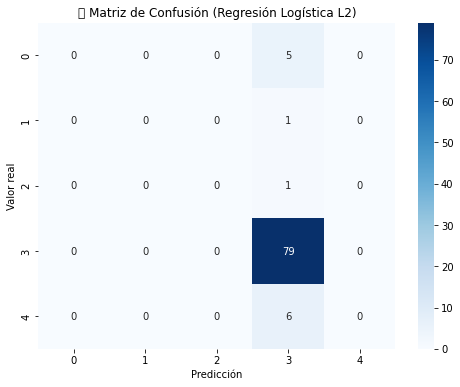

/Users/lucia/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


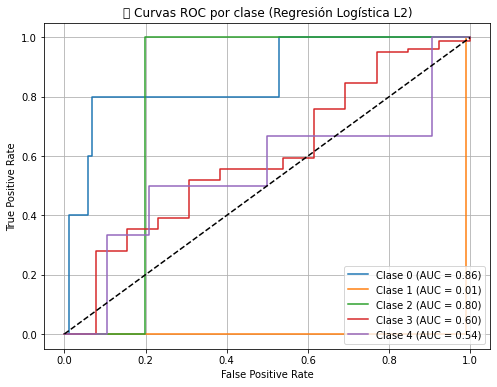

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, auc
from sklearn.preprocessing import label_binarize
import numpy as np

# 📊 MATRIZ DE CONFUSIÓN
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('📊 Matriz de Confusión (Regresión Logística L2)')
plt.xlabel('Predicción')
plt.ylabel('Valor real')
plt.show()

# 📈 CURVAS ROC MULTICLASE
# Binarizamos las clases
classes = np.unique(y_test)
y_test_bin = label_binarize(y_test, classes=classes)
n_classes = y_test_bin.shape[1]

# Calcular fpr, tpr y AUC por clase
fpr = {}
tpr = {}
roc_auc = {}

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Dibujar curvas ROC
plt.figure(figsize=(8, 6))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'Clase {classes[i]} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('📈 Curvas ROC por clase (Regresión Logística L2)')
plt.legend(loc='lower right')
plt.grid()
plt.show()


In [27]:
# Detener el medidor y obtener los resultados
tracker.stop()

[codecarbon INFO @ 20:34:43] Energy consumed for RAM : 0.000007 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 20:34:43] Energy consumed for all CPUs : 0.000012 kWh. Total CPU Power : 5.0 W
[codecarbon INFO @ 20:34:43] 0.000019 kWh of electricity used since the beginning.


3.312786436538472e-06